In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

import glob
import os

In [2]:
#Some styling
pd.options.display.float_format = '{:.1f}'.format
sns.set()
plt.style.use('ggplot')

#Label encoder used to get a numeric representation of a label
le = preprocessing.LabelEncoder()

#The activities
LABELS = ['standing',
          'walking-natural',
          'walking-rider',
          'trotting-natural',
          'trotting-rider',
          'running-natural',
          'running-rider',
          'jumping',
          'grazing',
          'eating',
          'head shake',
          'shaking',
          'scratch-biting',
          'rubbing',
          'fighting',
          'rolling',
          'scared']

#Sliding windows
TIME_PERIODS = 80
STEP_DISTANCE = 40

#Datasets
FILES = sorted(glob.glob('Data/*'))

# Set up dataframe

In [3]:
REMOVE_COLUMNS = ['Mx', 'My', 'Mz','A3D','G3D','M3D'] #Add columns to drop from dataframe

def loadDataFrame(files):
    """
    Simple function to set up dataframe and initial clean-up of the data
    files: path to files
    returns: combined dataframe of all files
    """
    df = pd.DataFrame()
    for file in files:
        csv = pd.read_csv(file)
        csv['filename']=file
        df = df.append(csv)
        
    df.drop(REMOVE_COLUMNS, axis=1, inplace=True)
    df['ActivityEncoded'] = le.fit_transform(df['label'].values.ravel())

    return df

def convert_to_float(x):

    try:
        return np.float(x)
    except:
        return np.nan
show_basic_dataframe_info(df)
df.head(20)

df = loadDataFrame(FILES)



# Plot data composition

In [5]:
def show_basic_dataframe_info(dataframe):

    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

show_basic_dataframe_info(df)
df.head(20)

Number of columns in the dataframe: 11
Number of rows in the dataframe: 10763567



,Ax,Ay,Az,Gx,Gy,Gz,datetime,label,segment,filename,ActivityEncoded
0,6.5,-1.2,3.3,-12.8,54.2,-3.4,2018-06-14 20:06:48.0988,walking-natural,13935,Data/subject_11_Patron_part_1.csv,16
1,6.6,-0.5,3.2,1.7,58.2,-6.8,2018-06-14 20:06:48.1088,walking-natural,13935,Data/subject_11_Patron_part_1.csv,16
2,6.7,0.8,3.5,26.2,60.6,-8.1,2018-06-14 20:06:48.1188,walking-natural,13935,Data/subject_11_Patron_part_1.csv,16
3,6.8,2.1,3.8,48.7,58.9,-8.8,2018-06-14 20:06:48.1288,walking-natural,13935,Data/subject_11_Patron_part_1.csv,16
4,6.8,3.2,4.2,60.0,55.4,-9.1,2018-06-14 20:06:48.1388,walking-natural,13935,Data/subject_11_Patron_part_1.csv,16
5,6.8,3.9,4.7,60.2,50.0,-8.2,2018-06-14 20:06:48.1488,walking-natural,13935,Data/subject_11_Patron_part_1.csv,16
6,6.7,3.5,5.3,50.8,44.5,-6.9,2018-06-14 20:06:48.1588,walking-natural,13935,Data/subject_11_Patron_part_1.csv,16
7,7.2,2.6,5.1,31.4,42.3,-4.8,2018-06-14 20:06:48.1688,walking-natural,13935,Data/subject_11_Patron_part_1.csv,16
8,7.6,1.6,4.3,2.9,43.5,-2.3,2018-06-14 20:06:48.1788,walking-natural,13935,Data/subject_11_Patron_part_1.csv,16
9,7.7,0.8,4.0,-18.1,48.6,1.5,2018-06-14 20:06:48.1888,walking-natural,13935,Data/subject_11_Patron_part_1.csv,16


In [4]:

# #Training examples per activity type
# df['label'].value_counts().plot(kind='bar', title='Training Examples of subject Viva by Activity Type')
# plt.show()

# SECONDS = 10 #nr of seconds to display accelerometer data
# SAMPLING_RATE = 20 #the sampling rate at which data was recorded

# def plot_activity(activity, data):

#     fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 10), sharex=True)
#     plot_axis(ax0, data['datetime'], data['Ax'], 'X-Axis')
#     plot_axis(ax1, data['datetime'], data['Ay'], 'Y-Axis')
#     plot_axis(ax2, data['datetime'], data['Az'], 'Z-Axis')
#     plt.subplots_adjust(hspace=0.2)
#     fig.suptitle(activity)
#     plt.subplots_adjust(top=0.90)
#     plt.show()

# def plot_axis(ax, x, y, title):

#     ax.plot(x, y, 'r')
#     ax.set_title(title)
#     ax.xaxis.set_visible(False)
#     ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
#     ax.set_xlim([min(x), max(x)])
#     ax.grid(True)

# #plot all 3 subplots for each activity
# for activity in np.unique(df['label']):
#     subset = df[df['label'] == activity][:SECONDS*SAMPLING_RATE] 
#     plot_activity(activity, subset)

In [18]:
# Define column name of the label vector
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df[LABEL] = le.fit_transform(df['label'].values.ravel())

# Get only relevant subjects

In [19]:
#These are the indexes of the relevant subjects, see FILES
indexes = [0,1,2,7,8,9,13,14,15,16,17]
subjects = [FILES[x] for x in indexes]

#new dataframe with only the horses in subjects
df = df[df['filename'].isin(subjects)]  


# Splitting in test and train

In [20]:
# Splittingin test and train data
def splitBySubject(data, name):
  '''
  Function to split train and test data by subject
  data = dataframe
  name = subject to put in test subset
  '''
  test = data[data['filename'].str.contains(name)]
  train = data[~data['filename'].str.contains(name)]
  return train, test


train, test = splitBySubject(df, 'Galoway')

print(len(train['filename'].unique()))
print(len(test['filename']. unique()))


8
3


# Feature scaling

In [48]:
train_x_max = train['Ax'].max()
train_y_max = train['Ay'].max()
train_z_max = train['Az'].max()

train_gx_max = train['Gx'].max()
train_gy_max = train['Gy'].max()
train_gz_max = train['Gz'].max()

pd.options.mode.chained_assignment = None 

#divide all 3 axis with the max value in the training set
train['Ax'] = train['Ax'] / train_x_max
train['Ay'] = train['Ay'] / train_y_max
train['Az'] = train['Az'] / train_z_max

train['Gx'] = train['Ax'] / train_gx_max
train['Gy'] = train['Ay'] / train_gy_max
train['Gz'] = train['Az'] / train_gz_max

train = train.round({'Ax': 4, 'Ay': 4, 'Az': 4, 'Gx':4, 'Gy':4, 'Gz':4})


# Windowing

In [46]:
def createWindows(df, time_steps, step, label_name):
    N_FEATURES = 6
    windows = []
    labels = []
    for i in range(0, len(df)-time_steps, step):
        axs = df['Ax'].values[i: i + time_steps]
        ays = df['Ay'].values[i: i + time_steps]
        azs = df['Az'].values[i: i + time_steps]
        
        gxs = df['Gx'].values[i: i + time_steps]
        gys = df['Gy'].values[i: i + time_steps]
        gzs = df['Gz'].values[i: i + time_steps]
        # Retrieve the most often used label in this segment
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        windows.append([axs, ays, azs, gxs, gys, gzs])
        labels.append(label)
    # Bring the segments into a better shape
    reshaped_windows = np.asarray(windows, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_windows, labels


x_train, y_train = createWindows(train, 
                                 TIME_PERIODS, 
                                 STEP_DISTANCE, 
                                 LABEL)

x_test, y_test = createWindows(test,
                               TIME_PERIODS, 
                               STEP_DISTANCE, 
                               LABEL)
print(len(x_train))


150827


# Store dimensions

In [35]:
# checking the shape of one dimentional xtrain
print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)


x_train shape:  (150827, 80, 6)
150827 training samples
y_train shape:  (150827,)


In [36]:
# initial values
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
num_classes = le.classes_.size
print(list(le.classes_))

['eating', 'fighting', 'food-fight', 'grazing', 'head-shake', 'rolling', 'rubbing', 'running-natural', 'running-rider', 'scratch-biting', 'shaking', 'standing', 'trotting-natural', 'trotting-rider', 'walking-natural', 'walking-rider']


In [37]:
# reshaping one dimentional xtrain into fitted data for the classifier
input_shape = (num_time_periods*num_sensors)
x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train.shape)
print('input_shape:', input_shape)

x_train shape: (150827, 480)
input_shape: 480


In [38]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')

In [39]:
# Applying one hot coding to y_train
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print('New y_train shape: ', y_train_hot.shape)

New y_train shape:  (150827, 16)


# Classifier

In [40]:
model_m = Sequential()
# Remark: since coreml cannot accept vector shapes of complex shape like
# [80,3] this workaround is used in order to reshape the vector internally
# prior feeding it into the network
model_m.add(Reshape((TIME_PERIODS, 6), input_shape=(input_shape,)))
model_m.add(Dense(100, activation='relu'))
model_m.add(Dense(100, activation='relu'))
model_m.add(Dense(100, activation='relu'))
model_m.add(Flatten())
model_m.add(Dense(num_classes, activation='softmax'))
print(model_m.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 80, 6)             0         
_________________________________________________________________
dense (Dense)                (None, 80, 100)           700       
_________________________________________________________________
dense_1 (Dense)              (None, 80, 100)           10100     
_________________________________________________________________
dense_2 (Dense)              (None, 80, 100)           10100     
_________________________________________________________________
flatten (Flatten)            (None, 8000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                128016    
Total params: 148,916
Trainable params: 148,916
Non-trainable params: 0
__________________________________________________

In [41]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

# Hyper-parameters
BATCH_SIZE = 400
EPOCHS = 50

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
history = model_m.fit(x_train,
                      y_train_hot,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)



Epoch 1/50
302/302 [==============================] - 13s 41ms/step - loss: 5.0494 - accuracy: 0.7249 - val_loss: 0.7948 - val_accuracy: 0.7110
Epoch 2/50
302/302 [==============================] - 17s 58ms/step - loss: 0.3310 - accuracy: 0.9064 - val_loss: 0.8145 - val_accuracy: 0.7443
Epoch 3/50
302/302 [==============================] - 17s 58ms/step - loss: 0.2670 - accuracy: 0.9225 - val_loss: 0.8567 - val_accuracy: 0.6592
Epoch 4/50
302/302 [==============================] - 18s 59ms/step - loss: 0.2458 - accuracy: 0.9261 - val_loss: 0.7805 - val_accuracy: 0.7048
Epoch 5/50
302/302 [==============================] - 18s 59ms/step - loss: 0.2390 - accuracy: 0.9288 - val_loss: 0.8686 - val_accuracy: 0.6745
Epoch 6/50
302/302 [==============================] - 18s 61ms/step - loss: 0.2239 - accuracy: 0.9327 - val_loss: 0.9794 - val_accuracy: 0.6377
Epoch 7/50
302/302 [==============================] - 17s 58ms/step - loss: 0.2251 - accuracy: 0.9309 - val_loss: 0.7808 - val_accuracy:

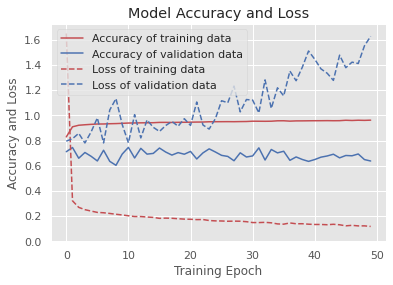

              precision    recall  f1-score   support

         0.0       1.00      0.06      0.12        97
         3.0       0.94      0.88      0.91     30664
         4.0       0.75      0.61      0.67      1773
         5.0       0.84      0.59      0.69       156
         6.0       0.94      0.94      0.94        18
         7.0       0.51      0.81      0.62       205
         8.0       0.91      0.95      0.93      5753
         9.0       0.26      0.51      0.34       153
        10.0       0.86      0.46      0.60        81
        11.0       0.97      0.95      0.96      8810
        12.0       0.24      0.84      0.38        89
        13.0       0.98      0.96      0.97     42595
        14.0       0.27      0.66      0.38      5353
        15.0       0.96      0.87      0.92     55080

    accuracy                           0.90    150827
   macro avg       0.75      0.72      0.67    150827
weighted avg       0.93      0.90      0.91    150827



In [44]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

# Print confusion matrix for training data
y_pred_train = model_m.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
print(classification_report(y_train, max_y_pred_train))


In [47]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model_m.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))

AxisError: axis 1 is out of bounds for array of dimension 1